In [ ]:
#Carregandos bibliotecas importantes para a atividade
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline
#plt.figure(figsize=(largura, altura))
plt.rcParams["figure.figsize"] = (12, 8)

import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.float_format', lambda x: '%.3f' % x)

import io, os

import missingno as miss

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest

from pprint import pprint
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.model_selection import train_test_split, cross_val_predict, KFold,cross_val_score

from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,ConfusionMatrixDisplay, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score

# from imblearn.over_sampling import SMOTE
# from imblearn.over_sampling import RandomOverSampler
# from imblearn.pipeline import Pipeline

from google.colab import drive

In [ ]:
#Montando o drive para carregar o arquivo
GOOGLE_COLAB = "google.colab" in str(get_ipython())

if GOOGLE_COLAB:
    from google.colab import drive
    drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
drive = '/content/drive/MyDrive/Mestrado/ids_datasets/BCCC-CIC-IDS-2017/dataset/'

In [ ]:
csvs = os.listdir(drive)
csvs

['botnet_ares.csv',
 'heartbleed.csv',
 'web_sql_injection.csv',
 'web_xss.csv',
 'dos_slowhttptest.csv',
 'dos_hulk.csv',
 'dos_golden_eye.csv',
 'ddos_loit.csv',
 'ftp_patator.csv',
 'friday_benign.csv',
 'dos_slowloris.csv',
 'web_brute_force.csv',
 'tuesday_benign.csv',
 'ssh_patator-new.csv',
 'thursday_benign.csv',
 'portscan.csv',
 'monday_benign.csv',
 'wednesday_benign.csv']

O arquivo botnet_ares.csv tem 5508 linhas e 122 colunas.
Total esperado de linhas: 5508
O arquivo heartbleed.csv tem 12 linhas e 122 colunas.
Total esperado de linhas: 5520
O arquivo web_sql_injection.csv tem 24 linhas e 122 colunas.
Total esperado de linhas: 5544
O arquivo web_xss.csv tem 1358 linhas e 122 colunas.
Total esperado de linhas: 6902
O arquivo dos_slowhttptest.csv tem 6860 linhas e 122 colunas.
Total esperado de linhas: 13762
O arquivo dos_hulk.csv tem 349240 linhas e 122 colunas.
Total esperado de linhas: 363002
O arquivo dos_golden_eye.csv tem 8364 linhas e 122 colunas.
Total esperado de linhas: 371366
O arquivo ddos_loit.csv tem 95733 linhas e 122 colunas.
Total esperado de linhas: 467099
O arquivo ftp_patator.csv tem 9531 linhas e 122 colunas.
Total esperado de linhas: 476630
O arquivo friday_benign.csv tem 364102 linhas e 122 colunas.
Total esperado de linhas: 840732
O arquivo dos_slowloris.csv tem 5177 linhas e 122 colunas.
Total esperado de linhas: 845909
O arquivo web_brute_force.csv tem 2734 linhas e 122 colunas.
Total esperado de linhas: 848643
O arquivo tuesday_benign.csv tem 395976 linhas e 122 colunas.
Total esperado de linhas: 1244619
O arquivo ssh_patator-new.csv tem 5949 linhas e 122 colunas.
Total esperado de linhas: 1250568
O arquivo thursday_benign.csv tem 133770 linhas e 122 colunas.
Total esperado de linhas: 1384338
O arquivo portscan.csv tem 161323 linhas e 122 colunas.
Total esperado de linhas: 1545661
O arquivo monday_benign.csv tem 495338 linhas e 122 colunas.
Total esperado de linhas: 2040999
O arquivo wednesday_benign.csv tem 397053 linhas e 122 colunas.
Total esperado de linhas: 2438052

In [ ]:
# total_rows=0
# for csv in csvs:
#     data = pd.read_csv(drive + csv)
#     total_rows+=len(data)
#     print(f'O arquivo {csv} tem {data.shape[0]} linhas e {data.shape[1]} colunas.')
#     print(f'Total esperado de linhas: {total_rows}')

O arquivo botnet_ares.csv tem 5508 linhas e 122 colunas.
Total esperado de linhas: 5508
O arquivo heartbleed.csv tem 12 linhas e 122 colunas.
Total esperado de linhas: 5520
O arquivo web_sql_injection.csv tem 24 linhas e 122 colunas.
Total esperado de linhas: 5544
O arquivo web_xss.csv tem 1358 linhas e 122 colunas.
Total esperado de linhas: 6902
O arquivo dos_slowhttptest.csv tem 6860 linhas e 122 colunas.
Total esperado de linhas: 13762
O arquivo dos_hulk.csv tem 349240 linhas e 122 colunas.
Total esperado de linhas: 363002
O arquivo dos_golden_eye.csv tem 8364 linhas e 122 colunas.
Total esperado de linhas: 371366
O arquivo ddos_loit.csv tem 95733 linhas e 122 colunas.
Total esperado de linhas: 467099
O arquivo ftp_patator.csv tem 9531 linhas e 122 colunas.
Total esperado de linhas: 476630
O arquivo friday_benign.csv tem 364102 linhas e 122 colunas.
Total esperado de linhas: 840732
O arquivo dos_slowloris.csv tem 5177 linhas e 122 colunas.
Total esperado de linhas: 845909
O arquivo 

In [ ]:
# Assuming 'drive' is the directory path
# file_path1 = os.path.join(drive, 'botnet_ares.csv')
# file_path2 = os.path.join(drive, 'heartbleed.csv')
file_path3 = os.path.join(drive, 'web_sql_injection.csv')
file_path4 = os.path.join(drive, 'web_xss.csv')
# file_path5 = os.path.join(drive, 'dos_slowhttptest.csv')
file_path6 = os.path.join(drive, 'dos_hulk.csv')
# file_path7 = os.path.join(drive, 'dos_golden_eye.csv')
file_path8 = os.path.join(drive, 'ddos_loit.csv')
# file_path9 = os.path.join(drive, 'ftp_patator.csv')
# file_path10 = os.path.join(drive, 'friday_benign.csv')
# file_path11 = os.path.join(drive, 'dos_slowloris.csv')
# file_path12 = os.path.join(drive, 'web_brute_force.csv')
# file_path13 = os.path.join(drive, 'tuesday_benign.csv')
# file_path14 = os.path.join(drive, 'ssh_patator-new.csv')
file_path15 = os.path.join(drive, 'thursday_benign.csv')
# file_path16 = os.path.join(drive, 'portscan.csv')
# file_path17 = os.path.join(drive, 'monday_benign.csv')
file_path18 = os.path.join(drive, 'wednesday_benign.csv')

In [ ]:
# Read the CSV and replace 'inf' and '-inf' with NaN
# df1 = pd.read_csv(file_path1, na_values=['inf', '-inf'])
# df2 = pd.read_csv(file_path2, na_values=['inf', '-inf'])
df3 = pd.read_csv(file_path3, na_values=['inf', '-inf'])
df4 = pd.read_csv(file_path4, na_values=['inf', '-inf'])
# df5 = pd.read_csv(file_path5, na_values=['inf', '-inf'])
df6 = pd.read_csv(file_path6, na_values=['inf', '-inf'])
# df7 = pd.read_csv(file_path7, na_values=['inf', '-inf'])
df8 = pd.read_csv(file_path8, na_values=['inf', '-inf'])
# df9 = pd.read_csv(file_path9, na_values=['inf', '-inf'])
# df10 = pd.read_csv(file_path10, na_values=['inf', '-inf'])
# df11 = pd.read_csv(file_path11, na_values=['inf', '-inf'])
# df12 = pd.read_csv(file_path12, na_values=['inf', '-inf'])
# df13 = pd.read_csv(file_path13, na_values=['inf', '-inf'])
# df14 = pd.read_csv(file_path14, na_values=['inf', '-inf'])
df15 = pd.read_csv(file_path15, na_values=['inf', '-inf'])
# df16 = pd.read_csv(file_path16, na_values=['inf', '-inf'])
# df17 = pd.read_csv(file_path17, na_values=['inf', '-inf'])
df18 = pd.read_csv(file_path18, na_values=['inf', '-inf'])

In [ ]:
# # Extrair nomes das colunas de cada DataFrame
# colunas_df1 = set(df1.columns)
# colunas_df2 = set(df2.columns)
# colunas_df3 = set(df3.columns)
# colunas_df4 = set(df4.columns)
# colunas_df5 = set(df5.columns)

# # Verificar se os nomes das colunas são os mesmos
# if colunas_df1 == colunas_df2 == colunas_df3 == colunas_df4== colunas_df5:
#     print("Todos os arquivos têm os mesmos nomes de colunas.")
# else:
#     print("Os arquivos têm nomes de colunas diferentes.")

#     # Mostrar diferenças
#     print("Colunas em arquivo1 e não em arquivo2:", colunas_df1 - colunas_df2)
#     print("Colunas em arquivo2 e não em arquivo3:", colunas_df2 - colunas_df3)
#     print("Colunas em arquivo1 e não em arquivo2:", colunas_df3 - colunas_df4)
#     print("Colunas em arquivo2 e não em arquivo3:", colunas_df4 - colunas_df5)

Todos os arquivos têm os mesmos nomes de colunas.


# Etapa de Concatenação

In [ ]:
# df = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8], ignore_index=True)
df = pd.concat([df3, df4, df6, df8, df15, df18], ignore_index=True)
df.shape

(977178, 122)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 977178 entries, 0 to 977177
Columns: 122 entries, flow_id to label
dtypes: float64(61), int64(55), object(6)
memory usage: 909.5+ MB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
src_port,977178.000,42079.691,20252.063,21.000,35267.000,50078.000,57006.000,65535.000
dst_port,977178.000,6255.031,16301.351,21.000,53.000,80.000,443.000,65529.000
duration,977178.000,12.621,114.007,-0.000,0.000,0.031,0.802,30154.592
packets_count,977178.000,20.511,4074.806,1.000,1.000,4.000,13.000,2458131.000
fwd_packets_count,977178.000,9.590,1745.377,0.000,1.000,2.000,7.000,1046340.000
...,...,...,...,...,...,...,...,...
bwd_packets_IAT_total,977178.000,201531897.605,511408648.580,-0.000,0.000,0.042,5.123,1499353199.805
subflow_fwd_packets,977178.000,2.428,553.335,0.000,0.000,0.000,0.000,523170.000
subflow_bwd_packets,977178.000,2.562,742.205,0.000,0.000,0.000,0.000,705895.500
subflow_fwd_bytes,977178.000,82.805,1051.251,0.000,0.000,0.000,0.000,311924.000


In [ ]:
len(df.columns)

122

# Início de Pré-processamento e limpeza

In [ ]:
print(df.duplicated().sum())

1979


In [ ]:
#remove duplicates without first occurrence
df.drop_duplicates(keep='first',inplace=True)

In [ ]:
print(df.duplicated().sum())

0


In [ ]:
# Lista para armazenar nomes das colunas que estão completamente vazias
empty_cols=[]

# Itera sobre cada coluna do dataframe
for col in df.columns:
  if df[col].isnull().all():
    empty_cols.append(col)
    if len(empty_cols == []):
      df.fillna(0, inplace=True)

print(f'Colunas vazias: {empty_cols}')

Colunas vazias: []


In [ ]:
nan_count = df.isna().any(axis=1).sum()
print(f"Número de linhas com pelo menos um NaN: {nan_count}")

Número de linhas com pelo menos um NaN: 0


In [ ]:
# Contar o número de NaN por coluna
nan_count_per_column = df.isna().sum()
print("Número de NaN por coluna:")
print(nan_count_per_column)

Número de NaN por coluna:
flow_id                0
timestamp              0
src_ip                 0
src_port               0
dst_ip                 0
                      ..
subflow_fwd_packets    0
subflow_bwd_packets    0
subflow_fwd_bytes      0
subflow_bwd_bytes      0
label                  0
Length: 122, dtype: int64


In [ ]:
df = df.dropna(axis=0, how='any')

In [ ]:
# Final check
print("Total NaN after conversion:", df.isna().sum().sum())

Total NaN after conversion: 0


In [ ]:
df = df.loc[:, df.nunique() > 1]

In [ ]:
df.shape

(975199, 119)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 975199 entries, 0 to 977177
Columns: 119 entries, flow_id to label
dtypes: float64(61), int64(52), object(6)
memory usage: 892.8+ MB


# Missing Values and the Percentage of Missing Values

In [ ]:
missing_data = df.isnull().sum().to_frame().rename(columns={0:"Total No. of Missing Values"})
missing_data["% of Missing Values"] = round((missing_data["Total No. of Missing Values"]/len(df))*100,2)
missing_data

,Total No. of Missing Values,% of Missing Values
flow_id,0,0.000
timestamp,0,0.000
src_ip,0,0.000
src_port,0,0.000
dst_ip,0,0.000
...,...,...
subflow_fwd_packets,0,0.000
subflow_bwd_packets,0,0.000
subflow_fwd_bytes,0,0.000
subflow_bwd_bytes,0,0.000


# Corrigindo os nomes das colunas

In [ ]:
print(df.columns.tolist()) # Check exact column names

['flow_id', 'timestamp', 'src_ip', 'src_port', 'dst_ip', 'dst_port', 'protocol', 'duration', 'packets_count', 'fwd_packets_count', 'bwd_packets_count', 'total_payload_bytes', 'fwd_total_payload_bytes', 'bwd_total_payload_bytes', 'payload_bytes_max', 'payload_bytes_min', 'payload_bytes_mean', 'payload_bytes_std', 'payload_bytes_variance', 'fwd_payload_bytes_max', 'fwd_payload_bytes_min', 'fwd_payload_bytes_mean', 'fwd_payload_bytes_std', 'fwd_payload_bytes_variance', 'bwd_payload_bytes_max', 'bwd_payload_bytes_min', 'bwd_payload_bytes_mean', 'bwd_payload_bytes_std', 'bwd_payload_bytes_variance', 'total_header_bytes', 'max_header_bytes', 'min_header_bytes', 'mean_header_bytes', 'std_header_bytes', 'fwd_total_header_bytes', 'fwd_max_header_bytes', 'fwd_min_header_bytes', 'fwd_mean_header_bytes', 'fwd_std_header_bytes', 'bwd_total_header_bytes', 'bwd_max_header_bytes', 'bwd_min_header_bytes', 'bwd_mean_header_bytes', 'bwd_std_header_bytes', 'fwd_avg_segment_size', 'bwd_avg_segment_size', '

In [ ]:
df.columns = df.columns.str.strip()  # Remove extra spaces
df.columns = df.columns.str.lower()
print(df.columns.tolist())  # Check the exact column name

['flow_id', 'timestamp', 'src_ip', 'src_port', 'dst_ip', 'dst_port', 'protocol', 'duration', 'packets_count', 'fwd_packets_count', 'bwd_packets_count', 'total_payload_bytes', 'fwd_total_payload_bytes', 'bwd_total_payload_bytes', 'payload_bytes_max', 'payload_bytes_min', 'payload_bytes_mean', 'payload_bytes_std', 'payload_bytes_variance', 'fwd_payload_bytes_max', 'fwd_payload_bytes_min', 'fwd_payload_bytes_mean', 'fwd_payload_bytes_std', 'fwd_payload_bytes_variance', 'bwd_payload_bytes_max', 'bwd_payload_bytes_min', 'bwd_payload_bytes_mean', 'bwd_payload_bytes_std', 'bwd_payload_bytes_variance', 'total_header_bytes', 'max_header_bytes', 'min_header_bytes', 'mean_header_bytes', 'std_header_bytes', 'fwd_total_header_bytes', 'fwd_max_header_bytes', 'fwd_min_header_bytes', 'fwd_mean_header_bytes', 'fwd_std_header_bytes', 'bwd_total_header_bytes', 'bwd_max_header_bytes', 'bwd_min_header_bytes', 'bwd_mean_header_bytes', 'bwd_std_header_bytes', 'fwd_avg_segment_size', 'bwd_avg_segment_size', '

# Checando valores únicos de atributos categoricos e numéricos

In [ ]:
def unique_vals(df, columns):
  for col_name in columns:
    print(f"Colunas: {col_name}\n{'-'*30}")
    unique_vals = df[col_name].unique()
    len_unique_vals = len(unique_vals)
    value_counts = df[col_name].value_counts()

    print(f'Valores Unicos: {len_unique_vals}\n')
    print(f"Value Counts: {value_counts}\n{'='*40}\n")

columns = df.columns.to_list()
unique_vals(df, columns)

Colunas: flow_id
------------------------------
Valores Unicos: 975077

Value Counts: flow_id
192.168.10.19_60224_104.97.73.5_443_TCP_2017-07-05 15:17:31.523466      2
172.16.0.1_60718_192.168.10.50_80_TCP_2017-07-05 09:51:28.795514        2
192.168.10.17_50288_104.88.95.221_443_TCP_2017-07-05 15:29:14.321227    2
192.168.10.25_53207_52.198.169.10_443_TCP_2017-07-05 14:28:33.184281    2
172.16.0.1_54158_192.168.10.50_80_TCP_2017-07-05 09:54:16.037767        2
                                                                       ..
172.16.0.1_47606_192.168.10.50_80_TCP_2017-07-05 09:58:41.585506        1
172.16.0.1_47304_192.168.10.50_80_TCP_2017-07-05 10:00:07.180868        1
172.16.0.1_47314_192.168.10.50_80_TCP_2017-07-05 10:00:07.186856        1
172.16.0.1_47608_192.168.10.50_80_TCP_2017-07-05 09:58:41.585571        1
192.168.10.50_80_172.16.0.1_47594_TCP_2017-07-05 09:58:41.597921        1
Name: count, Length: 975077, dtype: int64

Colunas: timestamp
------------------------------

In [ ]:
categ_feat = df.select_dtypes(include=['object']).columns
unique_vals(df, categ_feat)

Colunas: flow_id
------------------------------
Valores Unicos: 975077

Value Counts: flow_id
192.168.10.19_60224_104.97.73.5_443_TCP_2017-07-05 15:17:31.523466      2
172.16.0.1_60718_192.168.10.50_80_TCP_2017-07-05 09:51:28.795514        2
192.168.10.17_50288_104.88.95.221_443_TCP_2017-07-05 15:29:14.321227    2
192.168.10.25_53207_52.198.169.10_443_TCP_2017-07-05 14:28:33.184281    2
172.16.0.1_54158_192.168.10.50_80_TCP_2017-07-05 09:54:16.037767        2
                                                                       ..
172.16.0.1_47606_192.168.10.50_80_TCP_2017-07-05 09:58:41.585506        1
172.16.0.1_47304_192.168.10.50_80_TCP_2017-07-05 10:00:07.180868        1
172.16.0.1_47314_192.168.10.50_80_TCP_2017-07-05 10:00:07.186856        1
172.16.0.1_47608_192.168.10.50_80_TCP_2017-07-05 09:58:41.585571        1
192.168.10.50_80_172.16.0.1_47594_TCP_2017-07-05 09:58:41.597921        1
Name: count, Length: 975077, dtype: int64

Colunas: timestamp
------------------------------

In [ ]:
list_feat=[]
for feats in categ_feat:
  list_feat.append(feats)
  len_feat = len(list_feat)

print(f'Atributos categóricos: {list_feat}\n')
print(f'Tamanho: {len_feat}')

Atributos categóricos: ['flow_id', 'timestamp', 'src_ip', 'dst_ip', 'protocol']

Tamanho: 5


In [ ]:
numeric_feats = df.select_dtypes(include=['float64', 'int64']).columns
unique_vals(df, numeric_feats)

Colunas: total_payload_bytes
------------------------------
Valores Unicos: 32174

Value Counts: total_payload_bytes
0         339205
11615      91090
4134        6067
324         5141
160         4615
           ...  
105527         1
17565          1
15143          1
314102         1
97419          1
Name: count, Length: 32174, dtype: int64

Colunas: bwd_total_payload_bytes
------------------------------
Valores Unicos: 27453

Value Counts: bwd_total_payload_bytes
0         345801
11595     245873
3776        6075
264         4805
96          4784
           ...  
183572         1
140083         1
11994          1
12844          1
10162          1
Name: count, Length: 27453, dtype: int64

Colunas: bwd_bulk_total_size
------------------------------
Valores Unicos: 20586

Value Counts: bwd_bulk_total_size
0          810748
11595      121629
12970        2477
92            674
4946          434
            ...  
274099          1
6902612         1
1168175         1
1244478         1
987

In [ ]:
list_feat_num=[]
for feats in numeric_feats:
  list_feat_num.append(feats)
  len_feat_num = len(list_feat_num)

print(f'Atributos numéricos: {list_feat_num}\n')
print(f'Tamanho: {len_feat_num}')

Atributos numéricos: ['total_payload_bytes', 'bwd_total_payload_bytes', 'bwd_bulk_total_size']

Tamanho: 3


In [ ]:
df['label'].unique()

array(['Web_SQL_Injection', 'Web_XSS', 'DoS_Hulk', 'DDoS_LOIT', 'Benign'],
      dtype=object)

In [ ]:
df['label'] = df['label'].apply(lambda x: 0 if x == 'Benign' else 1)

In [ ]:
df['label'].unique()

array([1, 0])

In [ ]:
df_label_count = df.groupby('label').size().reset_index(name='count')
df_label_count.columns = ['label', 'count']

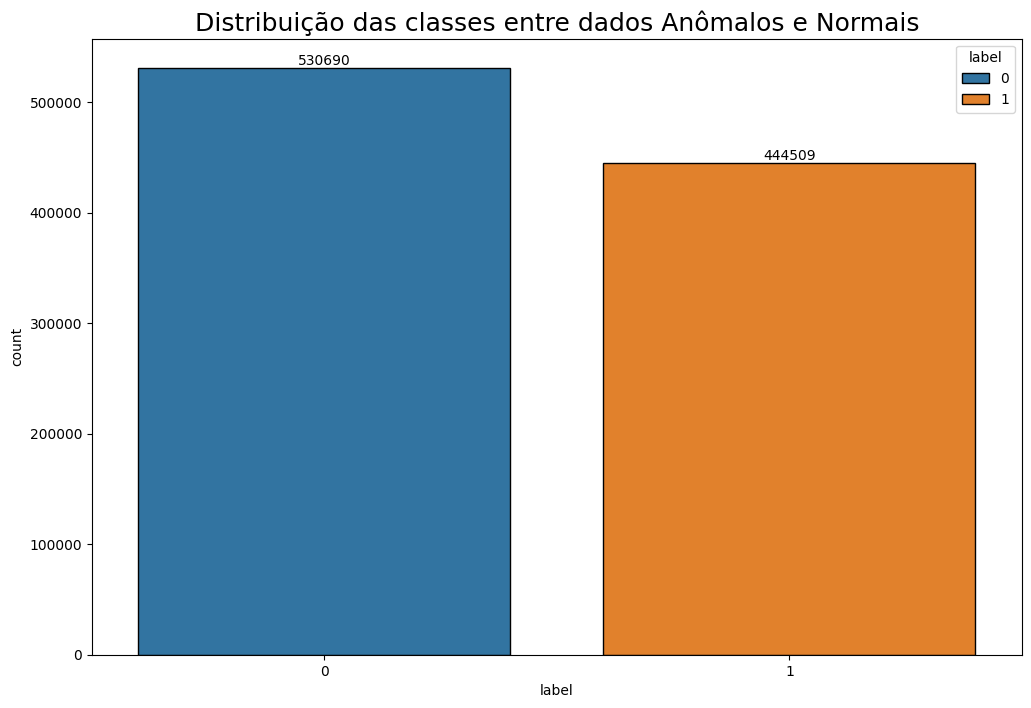

In [ ]:
ax = sns.barplot(
    data = df_label_count,
    x= 'label',
    y= 'count',
    hue= 'label',
    edgecolor='black')

ax.set_title('Distribuição das classes entre dados Anômalos e Normais',
          fontdict={'fontsize':18})

for container in ax.containers:
   ax.bar_label(container)

In [ ]:
count_val0 = df_label_count[df_label_count['label'] == 0]['count'].iloc[0]
count_val1 = df_label_count[df_label_count['label'] == 1]['count'].iloc[0]

print(f'Proporção de Classes:\n')
print(f'Instâncias normais: {count_val0/len(df)*100:.2f}%')
print(f'Instâncias anômalas: {count_val1/len(df)*100:.2f}%')

Proporção de Classes:

Instâncias normais: 54.42%
Instâncias anômalas: 45.58%


#Reducao do tamanho do dataset em termos de MP

In [ ]:
from pandas.api.types import is_datetime64_any_dtype as is_datetime
from pandas.api.types import is_categorical_dtype

def reduce_mem_usage(df, use_float16=False):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))

    for col in df.columns:
        if is_datetime(df[col]) or is_categorical_dtype(df[col]):
            # skip datetime type or categorical type
            continue
        col_type = df[col].dtype

        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if use_float16 and c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('object')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))

    return df

In [ ]:
df = reduce_mem_usage(df)

Memory usage of dataframe is 892.82 MB
Memory usage after optimization is: 399.91 MB
Decreased by 55.2%


#Label Encoder

In [ ]:
df.drop(['flow_id', 'timestamp', 'src_ip', 'dst_ip'], axis=1, inplace=True)

In [ ]:
le=preprocessing.LabelEncoder()
# clm = ['flow_id', 'timestamp', 'src_ip', 'dst_ip', 'protocol']
clm = ['protocol']
for x in clm:
    df[x]=le.fit_transform(df[x])

#Checking for Highly Correlated Feature

In [ ]:
df_corr = df

In [ ]:
# Calculate the correlation matrix
corr_matrix = df_corr.corr()

# Create a mask to identify the features with a correlation coefficient greater than or equal to 0.75
high_correlation_mask = corr_matrix >= 0.75

# Identify and list the highly correlated features
highly_correlated_features = []

for feature in high_correlation_mask.columns:
    correlated_with = high_correlation_mask.index[high_correlation_mask[feature]].tolist()
    for correlated_feature in correlated_with:
        if feature != correlated_feature and (correlated_feature, feature) not in highly_correlated_features:
            highly_correlated_features.append((feature, correlated_feature))

# Print the highly correlated features
print("Highly correlated features:")
for feature1, feature2 in highly_correlated_features:
    print(f"{feature1} and {feature2}")

Highly correlated features:
packets_count and fwd_packets_count
packets_count and bwd_packets_count
packets_count and total_payload_bytes
packets_count and bwd_total_payload_bytes
packets_count and total_header_bytes
packets_count and fwd_total_header_bytes
packets_count and bwd_total_header_bytes
packets_count and bwd_bulk_total_size
packets_count and bwd_bulk_per_packet
packets_count and bwd_bulk_duration
packets_count and ack_flag_counts
packets_count and fwd_ack_flag_counts
packets_count and bwd_ack_flag_counts
packets_count and subflow_fwd_packets
fwd_packets_count and bwd_packets_count
fwd_packets_count and total_payload_bytes
fwd_packets_count and bwd_total_payload_bytes
fwd_packets_count and total_header_bytes
fwd_packets_count and fwd_total_header_bytes
fwd_packets_count and bwd_total_header_bytes
fwd_packets_count and bwd_bulk_total_size
fwd_packets_count and bwd_bulk_per_packet
fwd_packets_count and bwd_bulk_duration
fwd_packets_count and ack_flag_counts
fwd_packets_count an

#Dropping High correlated

In [ ]:
# Create a set of features to drop
features_to_drop = set()

# Iterate over the highly correlated features and add one of each pair to the drop list
for feature1, feature2 in highly_correlated_features:
    if feature1 not in features_to_drop and feature2 not in features_to_drop:
        features_to_drop.add(feature2)  # You can choose feature1 or feature2 to drop

In [ ]:
features_to_drop

{'ack_flag_counts',
 'active_mean',
 'avg_bwd_packets_bulk_rate',
 'avg_segment_size',
 'bwd_ack_flag_counts',
 'bwd_avg_segment_size',
 'bwd_bulk_duration',
 'bwd_bulk_per_packet',
 'bwd_bulk_total_size',
 'bwd_ece_flag_counts',
 'bwd_fin_flag_counts',
 'bwd_init_win_bytes',
 'bwd_max_header_bytes',
 'bwd_mean_header_bytes',
 'bwd_min_header_bytes',
 'bwd_packets_count',
 'bwd_packets_iat_max',
 'bwd_packets_iat_min',
 'bwd_packets_iat_std',
 'bwd_packets_iat_total',
 'bwd_packets_rate',
 'bwd_payload_bytes_max',
 'bwd_payload_bytes_mean',
 'bwd_payload_bytes_min',
 'bwd_payload_bytes_std',
 'bwd_payload_bytes_variance',
 'bwd_psh_flag_counts',
 'bwd_std_header_bytes',
 'bwd_syn_flag_counts',
 'bwd_total_header_bytes',
 'bwd_total_payload_bytes',
 'cwr_flag_counts',
 'fin_flag_counts',
 'fwd_ack_flag_counts',
 'fwd_avg_segment_size',
 'fwd_bulk_per_packet',
 'fwd_bytes_rate',
 'fwd_cwr_flag_counts',
 'fwd_ece_flag_counts',
 'fwd_max_header_bytes',
 'fwd_mean_header_bytes',
 'fwd_packe

In [ ]:
# add to drop features: "rst_flag_counts" like 'label'

In [ ]:
features_to_drop = ['ack_flag_counts',
 'active_mean',
 'avg_bwd_packets_bulk_rate',
 'avg_segment_size',
 'bwd_ack_flag_counts',
 'bwd_avg_segment_size',
 'bwd_bulk_duration',
 'bwd_bulk_per_packet',
 'bwd_bulk_total_size',
 'bwd_ece_flag_counts',
 'bwd_fin_flag_counts',
 'bwd_init_win_bytes',
 'bwd_max_header_bytes',
 'bwd_mean_header_bytes',
 'bwd_min_header_bytes',
 'bwd_packets_count',
 'bwd_packets_iat_max',
 'bwd_packets_iat_min',
 'bwd_packets_iat_std',
 'bwd_packets_iat_total',
 'bwd_packets_rate',
 'bwd_payload_bytes_max',
 'bwd_payload_bytes_mean',
 'bwd_payload_bytes_min',
 'bwd_payload_bytes_std',
 'bwd_payload_bytes_variance',
 'bwd_psh_flag_counts',
 'bwd_std_header_bytes',
 'bwd_syn_flag_counts',
 'bwd_total_header_bytes',
 'bwd_total_payload_bytes',
 'cwr_flag_counts',
 'fin_flag_counts',
 'fwd_ack_flag_counts',
 'fwd_avg_segment_size',
 'fwd_bulk_per_packet',
 'fwd_bytes_rate',
 'fwd_cwr_flag_counts',
 'fwd_ece_flag_counts',
 'fwd_max_header_bytes',
 'fwd_mean_header_bytes',
 'fwd_packets_count',
 'fwd_packets_iat_max',
 'fwd_packets_iat_min',
 'fwd_packets_iat_total',
 'fwd_packets_rate',
 'fwd_payload_bytes_max',
 'fwd_payload_bytes_mean',
 'fwd_payload_bytes_min',
 'fwd_payload_bytes_std',
 'fwd_rst_flag_counts',
 'rst_flag_counts',
 'fwd_syn_flag_counts',
 'fwd_total_header_bytes',
 'idle_max',
 'idle_mean',
 'mean_header_bytes',
 'min_header_bytes',
 'packet_iat_max',
 'packet_iat_min',
 'packet_iat_std',
 'packet_iat_total',
 'payload_bytes_mean',
 'payload_bytes_std',
 'payload_bytes_variance',
 'subflow_bwd_bytes',
 'subflow_fwd_packets',
 'syn_flag_counts',
 'total_header_bytes',
 'total_payload_bytes']

In [ ]:
# Drop the features from the DataFrame
df= df.drop(columns=features_to_drop)

# Print the remaining features
print("Remaining features after dropping highly correlated ones:")
print(df.columns)

Remaining features after dropping highly correlated ones:
Index(['src_port', 'dst_port', 'protocol', 'duration', 'packets_count',
       'fwd_total_payload_bytes', 'payload_bytes_max', 'payload_bytes_min',
       'fwd_payload_bytes_variance', 'max_header_bytes', 'std_header_bytes',
       'fwd_min_header_bytes', 'fwd_std_header_bytes', 'fwd_init_win_bytes',
       'active_min', 'active_max', 'active_std', 'idle_min', 'idle_std',
       'bytes_rate', 'bwd_bytes_rate', 'packets_rate', 'down_up_rate',
       'avg_fwd_bytes_per_bulk', 'avg_fwd_packets_per_bulk',
       'avg_fwd_bulk_rate', 'avg_bwd_bytes_per_bulk', 'avg_bwd_bulk_rate',
       'fwd_bulk_state_count', 'fwd_bulk_total_size', 'fwd_bulk_duration',
       'bwd_bulk_state_count', 'psh_flag_counts', 'ece_flag_counts',
       'fwd_fin_flag_counts', 'fwd_psh_flag_counts', 'bwd_cwr_flag_counts',
       'bwd_rst_flag_counts', 'packets_iat_mean', 'fwd_packets_iat_mean',
       'fwd_packets_iat_std', 'bwd_packets_iat_mean', 'subflow_bwd

In [ ]:
df['label']

,label
0,1
1,1
2,1
3,1
4,1
...,...
977173,0
977174,0
977175,0
977176,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 975199 entries, 0 to 977177
Data columns (total 45 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   src_port                    975199 non-null  int32  
 1   dst_port                    975199 non-null  int32  
 2   protocol                    975199 non-null  int64  
 3   duration                    975199 non-null  float32
 4   packets_count               975199 non-null  int32  
 5   fwd_total_payload_bytes     975199 non-null  int32  
 6   payload_bytes_max           975199 non-null  int16  
 7   payload_bytes_min           975199 non-null  int16  
 8   fwd_payload_bytes_variance  975199 non-null  float32
 9   max_header_bytes            975199 non-null  int8   
 10  std_header_bytes            975199 non-null  float32
 11  fwd_min_header_bytes        975199 non-null  int8   
 12  fwd_std_header_bytes        975199 non-null  float32
 13  fwd_init_win_bytes 

#Best Features

In [ ]:
X = df.drop(["label"], axis=1)
y = df["label"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
train_index = X_train.columns
train_index

Index(['src_port', 'dst_port', 'protocol', 'duration', 'packets_count',
       'fwd_total_payload_bytes', 'payload_bytes_max', 'payload_bytes_min',
       'fwd_payload_bytes_variance', 'max_header_bytes', 'std_header_bytes',
       'fwd_min_header_bytes', 'fwd_std_header_bytes', 'fwd_init_win_bytes',
       'active_min', 'active_max', 'active_std', 'idle_min', 'idle_std',
       'bytes_rate', 'bwd_bytes_rate', 'packets_rate', 'down_up_rate',
       'avg_fwd_bytes_per_bulk', 'avg_fwd_packets_per_bulk',
       'avg_fwd_bulk_rate', 'avg_bwd_bytes_per_bulk', 'avg_bwd_bulk_rate',
       'fwd_bulk_state_count', 'fwd_bulk_total_size', 'fwd_bulk_duration',
       'bwd_bulk_state_count', 'psh_flag_counts', 'ece_flag_counts',
       'fwd_fin_flag_counts', 'fwd_psh_flag_counts', 'bwd_cwr_flag_counts',
       'bwd_rst_flag_counts', 'packets_iat_mean', 'fwd_packets_iat_mean',
       'fwd_packets_iat_std', 'bwd_packets_iat_mean', 'subflow_bwd_packets',
       'subflow_fwd_bytes'],
      dtype='objec

In [ ]:
# Check max and min values to see if they're too large
print("Max value:", np.max(X))
print("Min value:", np.min(X))

Max value: 3061841920.0
Min value: -2097152.0


In [ ]:
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info = pd.Series(mutual_info)
mutual_info.index = train_index
mutual_info.sort_values(ascending=False)

,0
payload_bytes_max,0.425
dst_port,0.418
fwd_total_payload_bytes,0.373
duration,0.365
packets_count,0.321
std_header_bytes,0.300
packets_rate,0.287
fwd_payload_bytes_variance,0.282
bwd_bytes_rate,0.270
down_up_rate,0.253


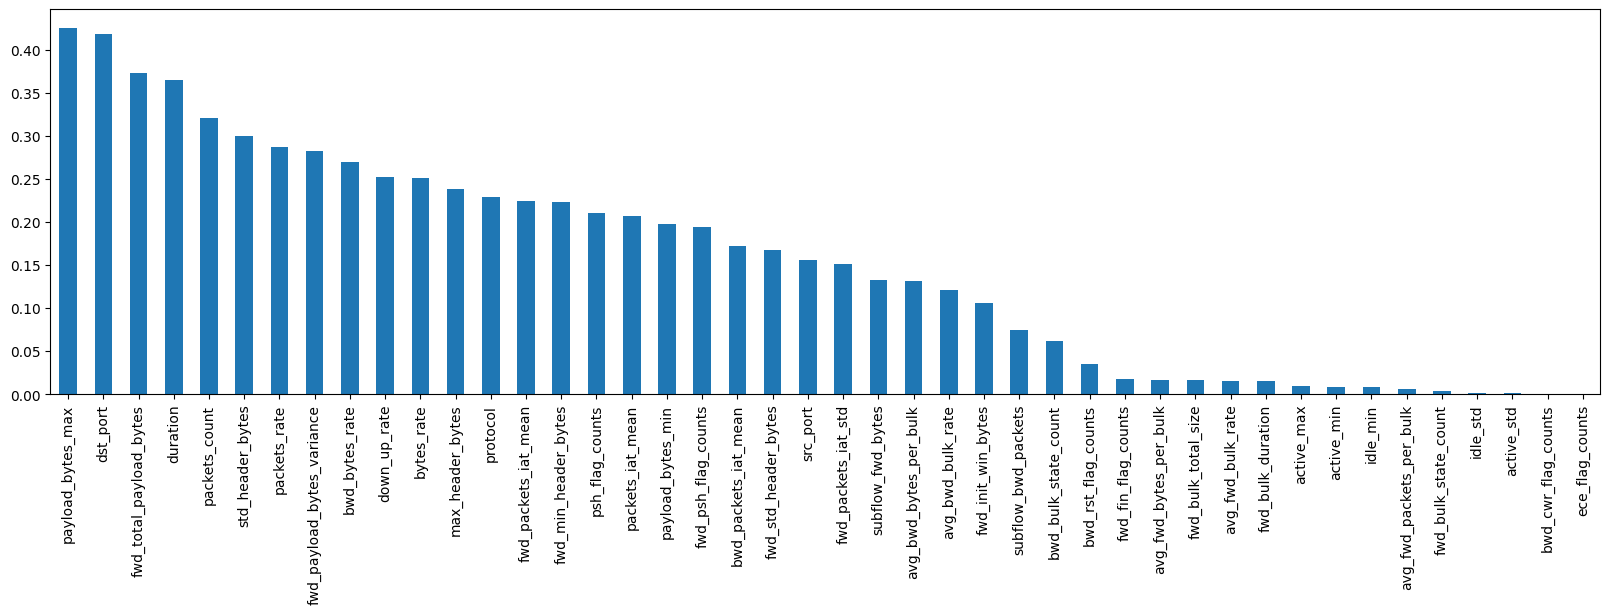

In [ ]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 5));

In [ ]:
mutual_info_sorted_features = mutual_info.sort_values(ascending=False).index.tolist()
print(mutual_info_sorted_features)

['payload_bytes_max', 'dst_port', 'fwd_total_payload_bytes', 'duration', 'packets_count', 'std_header_bytes', 'packets_rate', 'fwd_payload_bytes_variance', 'bwd_bytes_rate', 'down_up_rate', 'bytes_rate', 'max_header_bytes', 'protocol', 'fwd_packets_iat_mean', 'fwd_min_header_bytes', 'psh_flag_counts', 'packets_iat_mean', 'payload_bytes_min', 'fwd_psh_flag_counts', 'bwd_packets_iat_mean', 'fwd_std_header_bytes', 'src_port', 'fwd_packets_iat_std', 'subflow_fwd_bytes', 'avg_bwd_bytes_per_bulk', 'avg_bwd_bulk_rate', 'fwd_init_win_bytes', 'subflow_bwd_packets', 'bwd_bulk_state_count', 'bwd_rst_flag_counts', 'fwd_fin_flag_counts', 'avg_fwd_bytes_per_bulk', 'fwd_bulk_total_size', 'avg_fwd_bulk_rate', 'fwd_bulk_duration', 'active_max', 'active_min', 'idle_min', 'avg_fwd_packets_per_bulk', 'fwd_bulk_state_count', 'idle_std', 'active_std', 'bwd_cwr_flag_counts', 'ece_flag_counts']


#DF com as 20 melhores features do mutual_info incluindo label

In [ ]:
mutual_info = ['payload_bytes_max', 'dst_port', 'fwd_total_payload_bytes', 'duration', 'packets_count', 'std_header_bytes', 'packets_rate', 'fwd_payload_bytes_variance',
               'bwd_bytes_rate', 'down_up_rate', 'bytes_rate', 'max_header_bytes', 'protocol', 'fwd_packets_iat_mean', 'fwd_min_header_bytes', 'psh_flag_counts', 'packets_iat_mean',
               'payload_bytes_min', 'fwd_psh_flag_counts', 'bwd_packets_iat_mean', 'label']


In [ ]:
df = df[mutual_info]

In [ ]:
df.shape

(975199, 21)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 975199 entries, 0 to 977177
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   payload_bytes_max           975199 non-null  int16  
 1   dst_port                    975199 non-null  int32  
 2   fwd_total_payload_bytes     975199 non-null  int32  
 3   duration                    975199 non-null  float32
 4   packets_count               975199 non-null  int32  
 5   std_header_bytes            975199 non-null  float32
 6   packets_rate                975199 non-null  float32
 7   fwd_payload_bytes_variance  975199 non-null  float32
 8   bwd_bytes_rate              975199 non-null  float32
 9   down_up_rate                975199 non-null  float32
 10  bytes_rate                  975199 non-null  float32
 11  max_header_bytes            975199 non-null  int8   
 12  protocol                    975199 non-null  int64  
 13  fwd_packets_iat_mea

# Etapa de geracao de dataset para HDC

In [ ]:
# Dividir em chunks
chunk_size = len(df)  # Número de linhas por chunk
for i, chunk in enumerate(range(0, len(df), chunk_size)):
    df.iloc[chunk:chunk+chunk_size].to_csv(f"/content/drive/MyDrive/Mestrado/ids_datasets/BCCC-CIC-IDS-2017/dataset_hdc/bccc_cic_ids2017.csv", index=False)


#Etapa de *Padronização*

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
X = df.drop(["label"], axis=1)
y = df["label"]

In [ ]:
scale = StandardScaler()
# scale = MinMaxScaler()
scale.fit(X)
X_scaled = scale.transform(X)
X_scale_df = pd.DataFrame(X_scaled, columns=X.columns)
X_scale_df

,payload_bytes_max,dst_port,fwd_total_payload_bytes,duration,packets_count,std_header_bytes,packets_rate,fwd_payload_bytes_variance,bwd_bytes_rate,down_up_rate,bytes_rate,max_header_bytes,protocol,fwd_packets_iat_mean,fwd_min_header_bytes,psh_flag_counts,packets_iat_mean,payload_bytes_min,fwd_psh_flag_counts,bwd_packets_iat_mean
0,-0.476,-0.379,0.003,-0.067,-0.003,0.700,-0.094,-0.013,-0.037,0.334,-0.049,1.238,-0.594,-0.588,1.346,-0.003,-0.577,-0.428,0.010,-0.395
1,-0.034,-0.379,0.005,-0.066,-0.003,0.700,-0.094,-0.010,-0.037,0.334,-0.049,1.238,-0.594,-0.588,1.346,-0.003,-0.577,-0.428,0.010,-0.395
2,-0.020,-0.379,0.014,-0.067,-0.003,0.700,-0.094,0.011,-0.037,0.334,-0.049,1.238,-0.594,-0.588,1.346,-0.003,-0.577,-0.428,0.010,-0.395
3,0.745,-0.379,0.022,-0.066,-0.003,0.641,-0.094,0.018,-0.037,0.060,-0.049,1.238,-0.594,-0.588,1.346,-0.003,-0.577,-0.428,0.010,-0.395
4,0.027,-0.379,0.021,-0.067,-0.003,0.700,-0.094,0.030,-0.037,0.334,-0.049,1.238,-0.594,-0.588,1.346,-0.003,-0.577,-0.428,0.010,-0.395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
975194,-0.655,-0.357,-0.051,-0.111,-0.005,-0.855,-0.094,-0.067,-0.037,-1.307,-0.049,-0.405,-0.594,1.700,0.249,-0.032,1.733,-0.428,-0.206,-0.395
975195,-0.655,-0.357,-0.051,-0.111,-0.005,-0.855,-0.094,-0.067,-0.037,-1.307,-0.049,-0.405,-0.594,1.700,0.249,-0.032,1.733,-0.428,-0.206,-0.395
975196,-0.655,3.178,-0.051,-0.102,0.003,-0.855,-0.094,-0.067,-0.037,-1.307,-0.049,-0.405,-0.594,-0.588,0.249,-0.032,-0.577,-0.428,-0.206,-0.395
975197,-0.587,-0.376,0.168,-0.111,-0.003,-0.855,5.994,-0.067,-0.037,-1.307,11.889,-1.390,1.682,-0.588,-0.848,-0.032,-0.577,7.163,-0.206,-0.395


#Train and Test Split para Classificação

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scale_df, y, test_size=0.3, random_state=0)

#Aplicação dos Algoritmos

In [ ]:
print('--------Applying GaussianNB Classifier ----------')
gnb = GaussianNB()
gnb_fit = gnb.fit(X_train, y_train)
gnb_prediction = gnb.predict(X_test)

print('--------Applying KNeighborsClassifier Classifier ----------')
KNN_model = KNeighborsClassifier(n_neighbors=5)
KNN_model.fit(X_train, y_train)
KNN_prediction = KNN_model.predict(X_test)

print('--------Applying AdaBoostClassifier Classifier ----------')
AB = AdaBoostClassifier()
AB.fit(X_train, y_train)
AB_prediction = AB.predict(X_test)

print('--------Applying RandomForestClassifier Classifier ----------')
RF = RandomForestClassifier(max_depth=10, random_state=100)
RF.fit(X_train, y_train)
RF_prediction = RF.predict(X_test)

print('--------Applying LogisticRegression Classifier ----------')
LogR = LogisticRegression()
LogR.fit(X_train, y_train)
LogR_prediction = LogR.predict(X_test)

print('--------Applying DecisionTree Classifier ----------')
DT = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=10, min_samples_leaf=5)
DT.fit(X_train, y_train)
DT_prediction = DT.predict(X_test)

--------Applying GaussianNB Classifier ----------
--------Applying KNeighborsClassifier Classifier ----------
--------Applying AdaBoostClassifier Classifier ----------
--------Applying RandomForestClassifier Classifier ----------
--------Applying LogisticRegression Classifier ----------
--------Applying DecisionTree Classifier ----------


In [ ]:
print('-------Performance Evaluation----------')
#precision_score, recall_score, f1_score, accuracy_score
results = []
selector = 'LR'
results.append((selector,'','', '',''))
results.append(('Classifier','Accurary','Precision', 'Recall','F1-Score'))
results.append(('NB ', accuracy_score(y_test,  gnb_prediction)*100,
                precision_score(y_test,  gnb_prediction)*100,
                recall_score(y_test,  gnb_prediction)*100,
                f1_score(y_test,  gnb_prediction)*100))
results.append(('KNN ', accuracy_score(y_test, KNN_prediction)*100,
                precision_score(y_test, KNN_prediction)*100,
                recall_score(y_test, KNN_prediction)*100,
                f1_score(y_test, KNN_prediction)*100))
results.append(('RF ', accuracy_score(y_test,  RF_prediction)*100,
                precision_score(y_test,  RF_prediction)*100,
                recall_score(y_test,  RF_prediction)*100,
                f1_score(y_test,  RF_prediction)*100))
results.append(('AB ', accuracy_score(y_test,  AB_prediction)*100,
                precision_score(y_test,  AB_prediction)*100,
                recall_score(y_test,  AB_prediction)*100,
                f1_score(y_test,  AB_prediction)*100))
results.append(('LogR ', accuracy_score(y_test,  LogR_prediction)*100,
                precision_score(y_test,  LogR_prediction)*100,
                recall_score(y_test,  LogR_prediction)*100,
                f1_score(y_test,  LogR_prediction)*100))
results.append(('DT ', accuracy_score(y_test,  DT_prediction)*100,
                precision_score(y_test,  DT_prediction)*100,
                recall_score(y_test,  DT_prediction)*100,
                f1_score(y_test,  DT_prediction)*100))

print('type(results): ', type(results))
print('results: ', results)
df_results = pd.DataFrame(results)
print('type(df_results): ', type(df_results))
print('df_results: ', df_results)

-------Performance Evaluation----------
type(results):  <class 'list'>
results:  [('LR', '', '', '', ''), ('Classifier', 'Accurary', 'Precision', 'Recall', 'F1-Score'), ('NB ', 78.42254580257041, 68.05023512458783, 99.38288247805637, 80.78483655833463), ('KNN ', 99.78739403882965, 99.72983895108663, 99.80452952278243, 99.76717025768488), ('RF ', 99.79354662291496, 99.7618976309563, 99.78580629699529, 99.7738505316759), ('AB ', 98.71069182389937, 97.76616109556767, 99.44729037476408, 98.59956041344897), ('LogR ', 92.67842493847415, 87.23049537043187, 98.35610077589048, 92.45981737410148), ('DT ', 99.80687722176647, 99.79625926009153, 99.7805637937749, 99.78841090975818)]
type(df_results):  <class 'pandas.core.frame.DataFrame'>
df_results:              0         1          2       3         4
0          LR                                       
1  Classifier  Accurary  Precision  Recall  F1-Score
2         NB     78.423     68.050  99.383    80.785
3        KNN     99.787     99.730  99.